<a href="https://colab.research.google.com/github/priyanka-kommani/MINI-PROJECT/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING NECESSARY LIBRARIES AND DATA SETS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import cifar100

# SPLLITING THE DATA INTO TRAINING AND TESTING DATA

In [2]:
(x_train, _), (x_test, _) =cifar100.load_data()


169001437/169001437 [==============================] - 2s 0us/step


## PRINTING THE TRAIN DATA

In [3]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

## MAKING THE TARIN AND TEST DATA VALUES INTO NORMALIZED VALUES WHICH WAS NECESSARY FOR THE FURTHER PROCESS

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## RESHAPING THE DATA WHICH IS NECESSARY FOR THE FURTHER PROCESS

In [5]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)


## CHECKING THE SHAPE OF THE TEST DATA

In [6]:
x_test.shape

(10000, 32, 32, 3)

## ADDING THE NOISE FACTOR TO THE IMAGES

In [7]:
noise_factor =0.001
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

## CLIP FUNCTION IS USED TO GENERATE RANDOM VALUES AND SCALING THEM

In [8]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## PRINTING A SAMPLE IMAGE FROM THE DATA SET

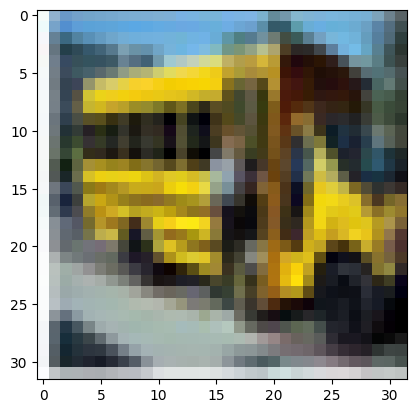

In [9]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(32,32,3))

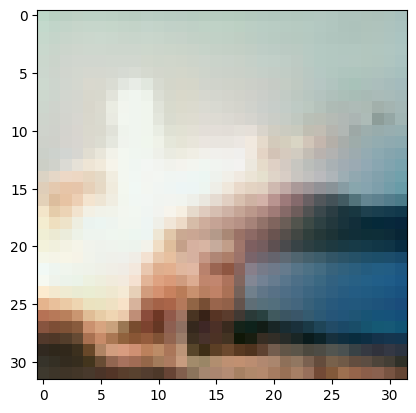

In [10]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(32,32,3))
plt.show()

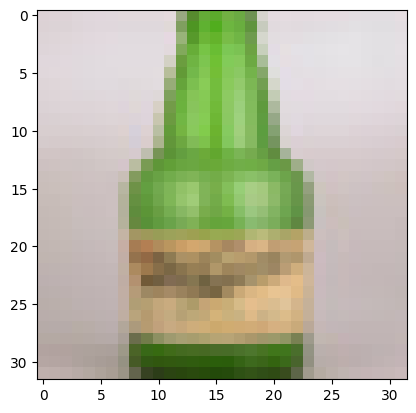

In [11]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(32,32,3))
plt.gray()


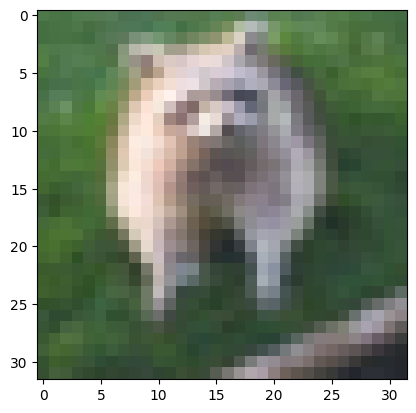

In [12]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(32,32,3))
plt.gray()


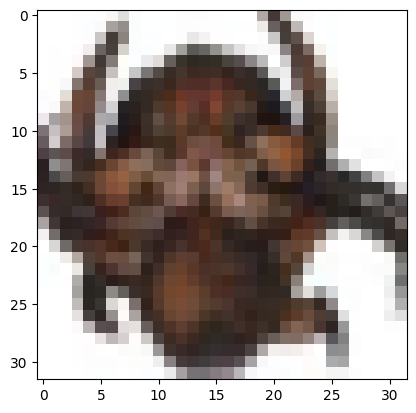

In [13]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(32,32,3))
plt.gray()


## ENCODING DECODING AND OUTPUT LAYERS ACTIVATION WITH REQUIRED FUNCTIONS

In [14]:
model = Sequential([
# encoder network
Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
MaxPooling2D(2, padding='same'),
Conv2D(16, 3, activation='relu', padding='same'),MaxPooling2D(2, padding='same'),
# decoder network
Conv2D(16, 3, activation='relu', padding='same'),
UpSampling2D(2),
Conv2D(32, 3, activation='relu', padding='same'),
UpSampling2D(2),
# output layer
Conv2D(3, 3, activation='sigmoid', padding='same')
])


## The model summary provides a concise overview of the model's architecture, layer shapes, and parameter counts.

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 16, 16, 16)       0

## The trained model is then saved as 'model6.h5' and evaluated using the test data

In [16]:
history = model.fit(x_train, x_train,
epochs = 40, batch_size=256,
validation_data = (x_test, x_test))
model.save('model6.h5') # creates a HDF5 file 'my_model.h5'
model.evaluate(x_test, x_test)


Epoch 1/40
196/196 [==============================] - 16s 23ms/step - loss: 0.0213 - accuracy: 0.6130 - val_loss: 0.0108 - val_accuracy: 0.6647
Epoch 2/40
196/196 [==============================] - 3s 16ms/step - loss: 0.0092 - accuracy: 0.7123 - val_loss: 0.0082 - val_accuracy: 0.7229
Epoch 3/40
196/196 [==============================] - 3s 15ms/step - loss: 0.0077 - accuracy: 0.7274 - val_loss: 0.0074 - val_accuracy: 0.7259
Epoch 4/40
196/196 [==============================] - 3s 15ms/step - loss: 0.0070 - accuracy: 0.7389 - val_loss: 0.0068 - val_accuracy: 0.7480
Epoch 5/40
196/196 [==============================] - 3s 15ms/step - loss: 0.0065 - accuracy: 0.7464 - val_loss: 0.0064 - val_accuracy: 0.7541
Epoch 6/40
196/196 [==============================] - 3s 17ms/step - loss: 0.0061 - accuracy: 0.7535 - val_loss: 0.0061 - val_accuracy: 0.7490
Epoch 7/40
196/196 [==============================] - 3s 16ms/step - loss: 0.0058 - accuracy: 0.7595 - val_loss: 0.0057 - val_accuracy: 0.758

[0.004511317703872919, 0.7775874137878418]

## The pandas library as pd and plots the training loss and validation loss from the history object using a DataFrame.

Text(0, 0.5, 'Loss')

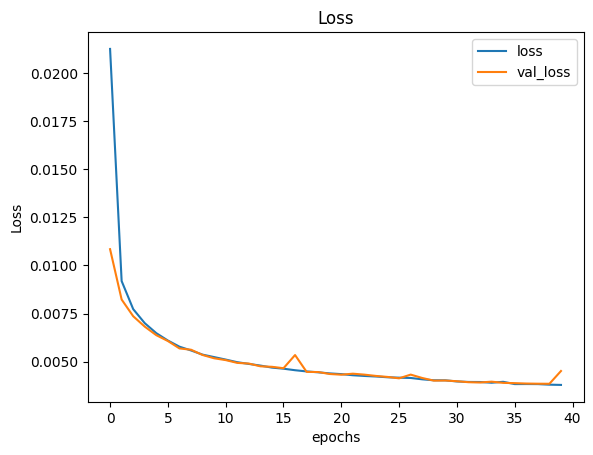

In [17]:
import pandas as pd
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

##  plots the training accuracy and validation accuracy from the history object using a DataFrame

313/313 [==============================] - 1s 2ms/step


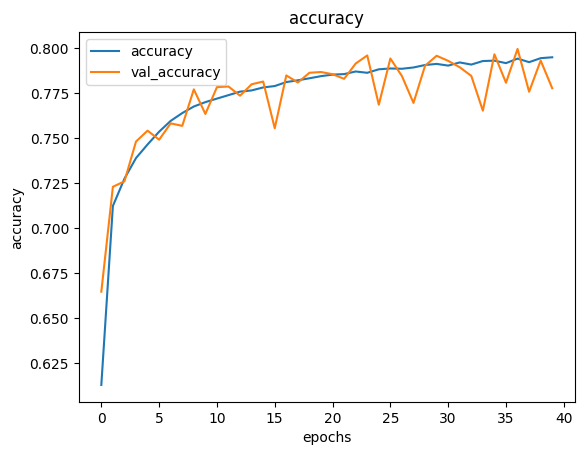

In [18]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
pred = model.predict(x_test)

## To take the input from the user to get the image after compression

1/1 [==============================] - 0s 234ms/step


<ipython-input-19-c2602341d686>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


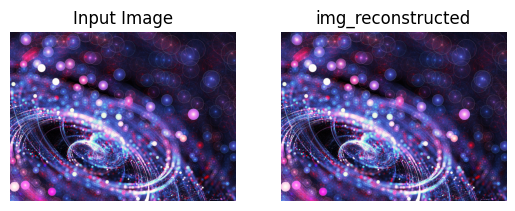

In [19]:
from sklearn.decomposition import PCA
from keras.models import load_model
import cv2
# taking the image as color
path="/content/origin.jpg"
img=cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)

input_image = cv2.imread(path)
input_image = cv2.resize(input_image, (32, 32))
input_image = input_image.astype('float32') / 255
input_image = np.expand_dims(input_image, axis=0)


# Load the trained model
model = load_model('model6.h5')

# Pass the input image through the model to obtain the reconstructed image
reconstructed_image = model.predict(input_image)

r,g,b=cv2.split(img)
r,g,b=r/255,g/255,b/255
pca_components=800
pca_r=PCA(n_components=pca_components)
reduced_r=pca_r.fit_transform(r)

pca_g=PCA(n_components=pca_components)
reduced_g=pca_g.fit_transform(g)

pca_b=PCA(n_components=pca_components)
reduced_b=pca_b.fit_transform(b)
combined=np.array([reduced_r,reduced_g,reduced_b])
reconstruction_r=pca_r.inverse_transform(reduced_r)
reconstruction_g=pca_g.inverse_transform(reduced_g)
reconstruction_b=pca_b.inverse_transform(reduced_b)
combined=np.array([reconstruction_r,reconstruction_g,reconstruction_b])
img_reconstructed=(cv2.merge((reconstruction_r,reconstruction_g,reconstruction_b)))
plt.imshow(img_reconstructed)
# Visualize the input and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed)
plt.axis('off')
plt.title("img_reconstructed")

plt.show()

## TO PRINT THE ORIGINAL IMAGE

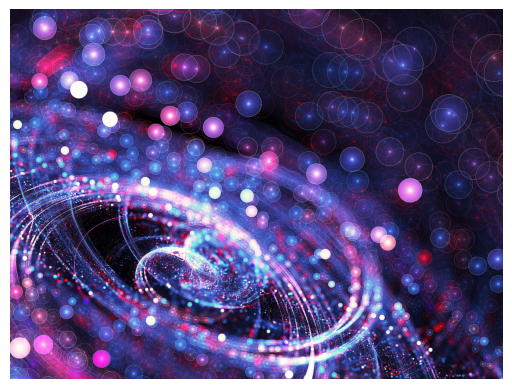

In [20]:
import cv2 as cv
image = cv.imread (path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow( image_rgb)

## TO PRINT THE RECONSTRUCTED IMAGE

(-0.5, 2499.5, 1874.5, -0.5)

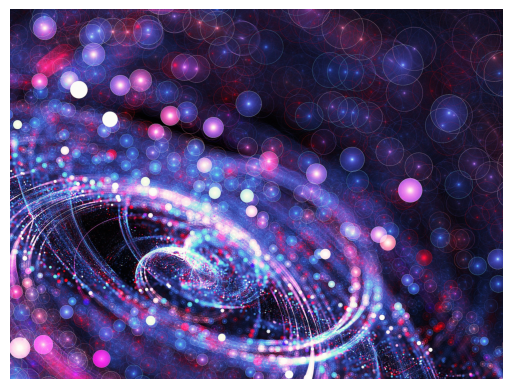

In [21]:
plt.imshow(img_reconstructed)
plt.axis('off')

1/1 [==============================] - 0s 77ms/step


<ipython-input-22-ac302401359e>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


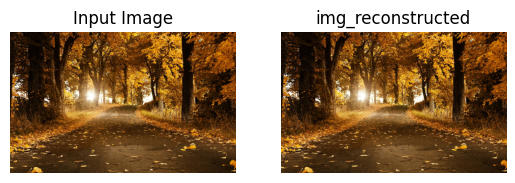

In [22]:
from sklearn.decomposition import PCA
from keras.models import load_model
import cv2
# taking the image as color
path="/content/image.jpg"
img=cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)

input_image = cv2.imread(path)
input_image = cv2.resize(input_image, (32, 32))
input_image = input_image.astype('float32') / 255
input_image = np.expand_dims(input_image, axis=0)


# Load the trained model
model = load_model('model6.h5')

# Pass the input image through the model to obtain the reconstructed image
reconstructed_image = model.predict(input_image)

r,g,b=cv2.split(img)
r,g,b=r/255,g/255,b/255
pca_components=800
pca_r=PCA(n_components=pca_components)
reduced_r=pca_r.fit_transform(r)

pca_g=PCA(n_components=pca_components)
reduced_g=pca_g.fit_transform(g)

pca_b=PCA(n_components=pca_components)
reduced_b=pca_b.fit_transform(b)
combined=np.array([reduced_r,reduced_g,reduced_b])
reconstruction_r=pca_r.inverse_transform(reduced_r)
reconstruction_g=pca_g.inverse_transform(reduced_g)
reconstruction_b=pca_b.inverse_transform(reduced_b)
combined=np.array([reconstruction_r,reconstruction_g,reconstruction_b])
img_reconstructed=(cv2.merge((reconstruction_r,reconstruction_g,reconstruction_b)))
plt.imshow(img_reconstructed)
# Visualize the input and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed)
plt.axis('off')
plt.title("img_reconstructed")

plt.show()

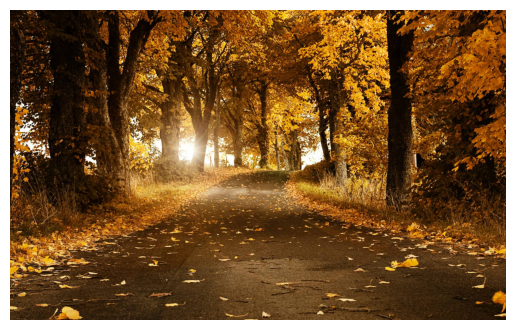

In [23]:
import cv2 as cv
image = cv.imread (path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow( image_rgb)

(-0.5, 1919.5, 1199.5, -0.5)

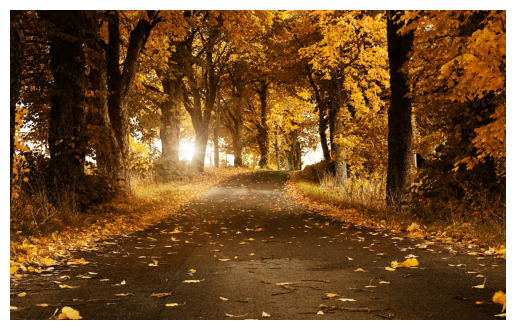

In [24]:
plt.imshow(img_reconstructed)
plt.axis('off')